In [1]:
import pathlib

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [3]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pytesseract
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import tensorflow as tf
import re

print(tf.__version__)

2.1.0


In [4]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [5]:
tf.gfile = tf.io.gfile

utils_ops.tf = tf.compat.v1

vis_util.tf = tf.compat.v1

----------------------------------------------

In [6]:
def load_exist_model(model_name):
    model_dir = model_name
    model_dir = pathlib.Path(model_dir)/"saved_model"

    model = tf.saved_model.load(str(model_dir))
    model = model.signatures['serving_default']

    return model

In [7]:
model_name = "ssd_mobilenet_v1_coco_2018_01_28"
model = load_exist_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [19]:
# https://github.com/tensorflow/models/blob/master/research/object_detection/data/mscoco_label_map.pbtxt
# 라벨 맵 불러오기 방법 1
with open("ssd_mobilenet_v1_coco_2018_01_28/mscoco_label_map.pbtxt","rt") as f:
    pb_classes = f.read().rstrip('\n').split('\n')
    
    classes_label = dict()
    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall(r"\d+", pb_classes[i+2])[0])
        pattern = r"display_name: \"(.*?)\""
        pb_text = re.search(pattern, pb_classes[i+3])
        classes_label[pb_classId] = pb_text.group(1)

In [8]:
# # List of the strings that is used to add correct label for each box.
# PATH_TO_LABELS = 'object_detection/data/mscoco_label_map.pbtxt'
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [13]:
model.output_dtypes

{'detection_scores': tf.float32,
 'detection_classes': tf.float32,
 'num_detections': tf.float32,
 'detection_boxes': tf.float32}

In [15]:
model.output_shapes

{'detection_scores': TensorShape([None, 100]),
 'detection_classes': TensorShape([None, 100]),
 'num_detections': TensorShape([None]),
 'detection_boxes': TensorShape([None, 100, 4])}

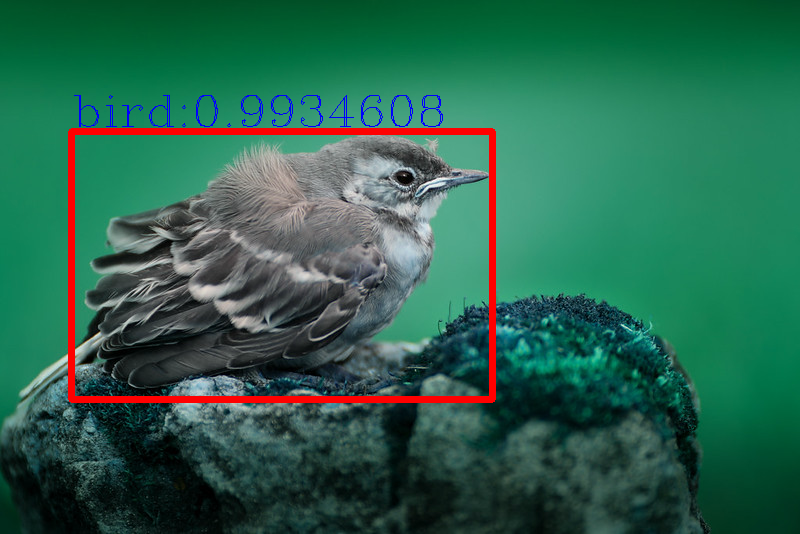

In [24]:
#이미지에서 적용

image = cv2.imread("files/bird.jpg")

image = np.asarray(image)
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis,...]

output_dict = model(input_tensor)

# 추론 결과 표시
rows, cols, _ = image.shape
for i in range(int(output_dict['num_detections'])):
    class_id = int(output_dict['detection_classes'][0][i])
    score = output_dict['detection_scores'][0][i].numpy()
    box = output_dict['detection_boxes'][0][i]
            
    if score > 0.7:
        x1 = int(box[1] * cols)
        y1 = int(box[0] * rows)
        x2 = int(box[3] * cols)
        y2 = int(box[2] * rows)
                

        cv2.putText(image, classes_label[class_id] + ":" + str(score), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX,
                    1.5, (0, 0, 255), 1)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 5)

display(Image.fromarray(image))

In [26]:
#비디오에서 적용

capture = cv2.VideoCapture("files/bird.mp4") # https://www.youtube.com/watch?v=XdlIbNrki5o

while True:
    
    ret, frame = capture.read()
    
    if (capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        break
        
    image = np.asarray(frame)
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis,...]

    output_dict = model(input_tensor)

    # 추론 결과 표시
    rows, cols, _ = image.shape
    for i in range(int(output_dict['num_detections'])):
        class_id = int(output_dict['detection_classes'][0][i])
        score = output_dict['detection_scores'][0][i].numpy()
        box = output_dict['detection_boxes'][0][i]

        if score > 0.7:
            x1 = int(box[1] * cols)
            y1 = int(box[0] * rows)
            x2 = int(box[3] * cols)
            y2 = int(box[2] * rows)


            cv2.putText(image, classes_label[class_id] + ":" + str(score), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX,
                        1.5, (0, 0, 255), 1)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 5)

    cv2.imshow("Object Detections", image)
    
    if cv2.waitKey(33) == ord('q'): 
        cv2.destroyAllWindows()
        break

------------------------------------------------------------

In [43]:
import PIL.ImageColor as ImageColor

In [6]:
def load_exist_model(model_name):
    model_dir = model_name
    model_dir = pathlib.Path(model_dir)/"saved_model"

    model = tf.saved_model.load(str(model_dir))
    model = model.signatures['serving_default']

    return model

In [41]:
# https://github.com/tensorflow/models/blob/master/research/object_detection/utils/visualization_utils.py
STANDARD_COLORS = [
    'AliceBlue', 'Chartreuse', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque',
    'BlanchedAlmond', 'BlueViolet', 'BurlyWood', 'CadetBlue', 'AntiqueWhite',
    'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan',
    'DarkCyan', 'DarkGoldenRod', 'DarkGrey', 'DarkKhaki', 'DarkOrange',
    'DarkOrchid', 'DarkSalmon', 'DarkSeaGreen', 'DarkTurquoise', 'DarkViolet',
    'DeepPink', 'DeepSkyBlue', 'DodgerBlue', 'FireBrick', 'FloralWhite',
    'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod',
    'Salmon', 'Tan', 'HoneyDew', 'HotPink', 'IndianRed', 'Ivory', 'Khaki',
    'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue',
    'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey',
    'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue',
    'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime',
    'LimeGreen', 'Linen', 'Magenta', 'MediumAquaMarine', 'MediumOrchid',
    'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen',
    'MediumTurquoise', 'MediumVioletRed', 'MintCream', 'MistyRose', 'Moccasin',
    'NavajoWhite', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed',
    'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed',
    'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple',
    'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Green', 'SandyBrown',
    'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue',
    'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'GreenYellow',
    'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
    'WhiteSmoke', 'Yellow', 'YellowGreen'
]

In [8]:
# https://github.com/tensorflow/models/blob/master/research/object_detection/data/mscoco_label_map.pbtxt
# 라벨 맵 불러오기 방법 1
with open("ssd_mobilenet_v1_coco_2018_01_28/mscoco_label_map.pbtxt","rt") as f:
    pb_classes = f.read().rstrip('\n').split('\n')
    
    classes_label = dict()
    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall(r"\d+", pb_classes[i+2])[0])
        pattern = r"display_name: \"(.*?)\""
        pb_text = re.search(pattern, pb_classes[i+3])
        classes_label[pb_classId] = pb_text.group(1)

In [7]:
model_name = "mask_rcnn_inception_v2_coco_2018_01_28"
model = load_exist_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [9]:
# # List of the strings that is used to add correct label for each box.
# PATH_TO_LABELS = 'object_detection/data/mscoco_label_map.pbtxt'
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [10]:
model.output_dtypes

{'detection_scores': tf.float32,
 'detection_classes': tf.float32,
 'detection_masks': tf.float32,
 'num_detections': tf.float32,
 'detection_boxes': tf.float32}

In [11]:
model.output_shapes

{'detection_scores': TensorShape([None, 100]),
 'detection_classes': TensorShape([None, 100]),
 'detection_masks': TensorShape([None, None, None, None]),
 'num_detections': TensorShape([None]),
 'detection_boxes': TensorShape([None, 100, 4])}

(534, 800)


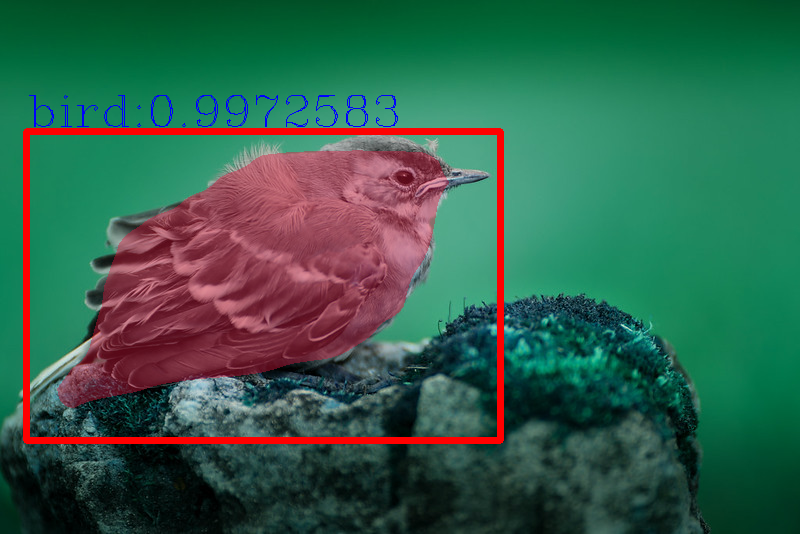

In [51]:
#이미지에서 적용

image = cv2.imread("files/bird.jpg")

image = np.asarray(image)
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis,...]

output_dict = model(input_tensor)

# 추론 결과 표시
rows, cols, _ = image.shape
for i in range(int(output_dict['num_detections'])):
    class_id = int(output_dict['detection_classes'][0][i])
    score = output_dict['detection_scores'][0][i].numpy()
    box = output_dict['detection_boxes'][0][i]
    mask = output_dict['detection_masks'][0][i]    
    
    if score > 0.7:
        x1 = int(box[1] * cols)
        y1 = int(box[0] * rows)
        x2 = int(box[3] * cols)
        y2 = int(box[2] * rows)

        cv2.putText(image, classes_label[class_id] + ":" + str(score), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX,
                    1.5, (0, 0, 255), 1)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        
        mask = tf.expand_dims(mask,axis=-1)        
        mask = tf.image.resize(mask,(y2-y1,x2-x1))
        mask_reframed = tf.cast(mask > 0.5, tf.uint8)
        mask_reframed = tf.squeeze(mask_reframed)
        # for display
#         mask_reframed_d = mask_reframed * 255
#         display(Image.fromarray(mask_reframed_d.numpy()))
        
        full_mask = np.zeros((rows, cols), dtype=np.uint8)
        full_mask[y1:y2,x1:x2] = mask_reframed
        # for display
#         full_mask_d = full_mask * 255
#         display(Image.fromarray(full_mask_d))
        
        pil_image = Image.fromarray(image)
        color = STANDARD_COLORS[class_id%len(STANDARD_COLORS)]
        
        alpha = 0.4
        rgb = ImageColor.getrgb(color)

        solid_color = np.expand_dims(np.ones_like(full_mask), axis=2) * np.reshape(list(rgb), [1, 1, 3])
        pil_solid_color = Image.fromarray(np.uint8(solid_color)).convert('RGBA')
        pil_mask = Image.fromarray(np.uint8(255.0*alpha*full_mask)).convert('L')
        pil_image = Image.composite(pil_solid_color, pil_image, pil_mask)
        np.copyto(image, np.array(pil_image.convert('RGB')))
        
        
        

display(Image.fromarray(image))

-----

In [7]:
def run_inference_for_single_image_test(output_dict, image):
    image = np.asarray(image)
    
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(output_dict.pop('num_detections'))
    
    output_dict = {key:value[0, :num_detections].numpy() 
                                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections
    
    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
    # Handle models with masks:
    if 'detection_masks' in output_dict:
        # Reframe the the bbox mask to the image size.
#         print("output_dict['detection_masks'] : ", output_dict['detection_masks'])
#         print("output_dict['detection_boxes'] : ", output_dict['detection_boxes'])
        
#         print("type(output_dict['detection_masks']) : ", type(output_dict['detection_masks']))
#         print("type(output_dict['detection_boxes']) : ", type(output_dict['detection_boxes']))
        
#         print("image.shape[0], image.shape[1] : " , image.shape[0], image.shape[1])
        
        
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                            output_dict['detection_masks'], output_dict['detection_boxes'],
                             image.shape[0], image.shape[1])            
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                                                             tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
        
    return output_dict

In [8]:
def show_inference_test(output_dict, image):
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = np.array(image)
    # Actual detection.
    output_dict = run_inference_for_single_image_test(output_dict, image_np)
    
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            output_dict['detection_boxes'],
            output_dict['detection_classes'],
            output_dict['detection_scores'],
            category_index,
            instance_masks=output_dict.get('detection_masks_reframed', None),
            use_normalized_coordinates=True,
            min_score_thresh = .7,
            line_thickness=8)
    

#     display(Image.fromarray(image_np))
    
    return image_np

In [2]:
# 그래프 정의
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
with tf.compat.v1.gfile.GFile("mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb","rb") as f:
    graph = tf.compat.v1.GraphDef()
    graph.ParseFromString(f.read())

In [3]:
# https://github.com/tensorflow/models/blob/master/research/object_detection/data/mscoco_label_map.pbtxt
# 라벨 맵 불러오기 방법 1
with open("ssd_mobilenet_v1_coco_2018_01_28/mscoco_label_map.pbtxt","rt") as f:
    pb_classes = f.read().rstrip('\n').split('\n')
    
    classes_label = dict()
    for i in range(0, len(pb_classes), 5):
        pb_classId = int(re.findall(r"\d+", pb_classes[i+2])[0])
        pattern = r"display_name: \"(.*?)\""
        pb_text = re.search(pattern, pb_classes[i+3])
        classes_label[pb_classId] = pb_text.group(1)

In [16]:
# 이미지에서 적용
# 세션 생성
# 직접 메소드 작성 중...

def unmold_mask(mask, bbox, image_shape):
    """Converts a mask generated by the neural network to a format similar
    to its original shape.
    mask: [height, width] of type float. A small, typically 28x28 mask.
    bbox: [y1, x1, y2, x2]. The box to fit the mask in.
    Returns a binary mask with the same size as the original image.
    """
    threshold = 0.5
    y1, x1, y2, x2 = bbox
    mask = resize(mask, (y2 - y1, x2 - x1))
    mask = np.where(mask >= threshold, 1, 0).astype(np.bool)

    # Put the mask in the right location.
    full_mask = np.zeros(image_shape[:2], dtype=np.bool)
    full_mask[y1:y2, x1:x2] = mask
    return full_mask

# 추론 이미지 생성
img = cv2.imread("files/bird.jpg")

input_img = cv2.resize(img, (300,300))
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

with tf.compat.v1.Session() as sess:
    tf.compat.v1.import_graph_def(graph, name='')    
    # 그래프 연산 수행
    num_detections, scores, classes, boxes, masks = sess.run(
        fetches=[sess.graph.get_tensor_by_name("num_detections:0"),
                sess.graph.get_tensor_by_name("detection_scores:0"),
                sess.graph.get_tensor_by_name("detection_classes:0"),
                sess.graph.get_tensor_by_name("detection_boxes:0"),
                sess.graph.get_tensor_by_name("detection_masks:0")],
    feed_dict={"image_tensor:0": input_img.reshape(1, input_img.shape[0], input_img.shape[1],
                                                    input_img.shape[2])}
    )
    
    # 추론 결과 표시
    rows, cols, _ = img.shape
    for i in range(int(num_detections[0])):
        class_id = int(classes[0][i])
        score = scores[0][i]
        box = boxes[0][i]
            
        if score > 0.7:
            x1 = int(box[1] * cols)
            y1 = int(box[0] * rows)
            x2 = int(box[3] * cols)
            y2 = int(box[2] * rows)
                

            cv2.putText(img, classes_label[class_id] + ":" + str(score), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX,
                        1.5, (0, 0, 255), 1)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 5)
            
            mask = tf.expand_dims(masks[0][i],-1)
            print(mask.shape)
            
            display(mask)
            
            cv2.imshow("mask", mask)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            
            threshold = 0.5
            mask = tf.image.resize(tf.expand_dims(masks[0][i],-1),(y2-y1,x2-x1))
            
            cv2.imshow("mask", mask)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        
        


    cv2.imshow("Object Detections", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


(15, 15, 1)


<tf.Tensor 'ExpandDims_20:0' shape=(15, 15, 1) dtype=float32>

TypeError: Expected Ptr<cv::UMat> for argument 'mat'

In [6]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

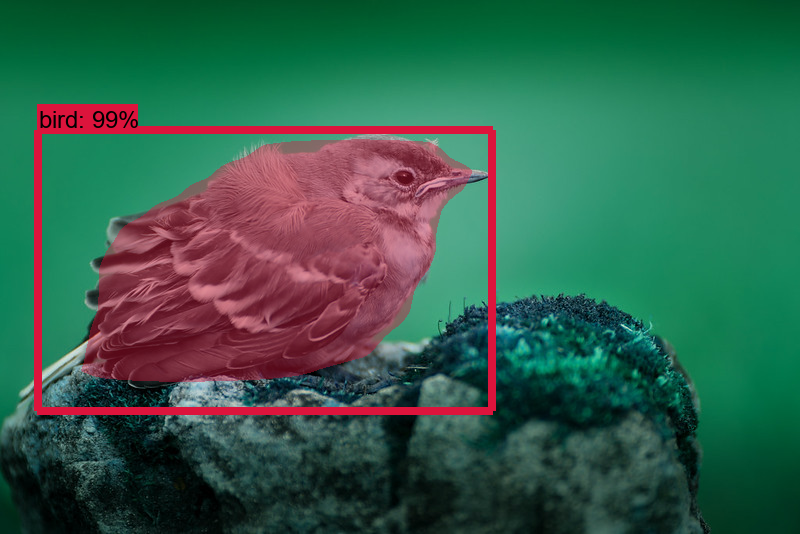

In [18]:
# 이미지에서 적용
# 세션 생성
# tensorflow model research 에서 제공하는 메소드 이용
    
# 추론 이미지 생성
img = cv2.imread("files/bird.jpg")

input_img = cv2.resize(img, (300,300))
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

with tf.compat.v1.Session() as sess:
    tf.compat.v1.import_graph_def(graph, name='')    
    # 그래프 연산 수행
    num_detections, scores, classes, boxes, masks = sess.run(
        fetches=[sess.graph.get_tensor_by_name("num_detections:0"),
                sess.graph.get_tensor_by_name("detection_scores:0"),
                sess.graph.get_tensor_by_name("detection_classes:0"),
                sess.graph.get_tensor_by_name("detection_boxes:0"),
                sess.graph.get_tensor_by_name("detection_masks:0")],
    feed_dict={"image_tensor:0": input_img.reshape(1, input_img.shape[0], input_img.shape[1],
                                                    input_img.shape[2])}
    )
    
output_dict = {'num_detections':int(num_detections), 'detection_scores':tf.convert_to_tensor(scores),
                   'detection_classes':tf.convert_to_tensor(classes,dtype=tf.int64), 'detection_boxes': tf.convert_to_tensor(boxes), 
                   'detection_masks':tf.convert_to_tensor(masks)}
    
img = show_inference_test(output_dict,img)


display(Image.fromarray(img))
    

                
#     cv2.imshow("Object Detections", img)
#     cv2.waitKey(0) 
#     cv2.destroyAllWindows()

In [19]:
# 비디오에선 진짜 너무너무너무너무 느려서 못써먹겠다...
# 세션을 열었다 닫았다 해서 그런듯.


# 비디오에서 적용    
# 추론 이미지 생성
capture = cv2.VideoCapture("files/bird.mp4") # https://www.youtube.com/watch?v=XdlIbNrki5o

while True:
    ret, frame = capture.read()
        
    if (capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        break
        
    input_img = cv2.resize(frame, (300,300))
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    with tf.compat.v1.Session() as sess:
        tf.compat.v1.import_graph_def(graph, name='')
        # 그래프 연산 수행
        num_detections, scores, classes, boxes, masks = sess.run(
            fetches=[sess.graph.get_tensor_by_name("num_detections:0"),
                    sess.graph.get_tensor_by_name("detection_scores:0"),
                    sess.graph.get_tensor_by_name("detection_classes:0"),
                    sess.graph.get_tensor_by_name("detection_boxes:0"),
                    sess.graph.get_tensor_by_name("detection_masks:0")],
        feed_dict={"image_tensor:0": input_img.reshape(1, input_img.shape[0], input_img.shape[1],
                                                        input_img.shape[2])}
        )

    output_dict = {'num_detections':int(num_detections), 'detection_scores':tf.convert_to_tensor(scores),
                    'detection_classes':tf.convert_to_tensor(classes,dtype=tf.int64), 'detection_boxes': tf.convert_to_tensor(boxes), 
                    'detection_masks':tf.convert_to_tensor(masks)}

    frame = show_inference_test(output_dict,frame)

    cv2.imshow("Object Detections", frame)

    if cv2.waitKey(33) == ord('q'): 
        cv2.destroyAllWindows()
        break
    #     cv2.imshow("Object Detections", img)
    #     cv2.waitKey(0) 
    #     cv2.destroyAllWindows()

KeyboardInterrupt: 

In [7]:
def load_exist_model(model_name):
    model_dir = model_name
    model_dir = pathlib.Path(model_dir)/"saved_model"

    model = tf.saved_model.load(str(model_dir))
    model = model.signatures['serving_default']

    return model

In [8]:
def run_inference_for_single_image(model, image):
    image = np.asarray(image)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]

    # Run inference
    output_dict = model(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections].numpy() 
                                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
     
    # Handle models with masks:
    if 'detection_masks' in output_dict:
        # Reframe the the bbox mask to the image size.
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                            output_dict['detection_masks'], output_dict['detection_boxes'],
                             image.shape[0], image.shape[1])            
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                                                             tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
        
    return output_dict

In [9]:
def show_inference_test2(model, image):
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = np.array(image)
    # Actual detection.
    output_dict = run_inference_for_single_image(model, image_np)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            output_dict['detection_boxes'],
            output_dict['detection_classes'],
            output_dict['detection_scores'],
            category_index,
            instance_masks=output_dict.get('detection_masks_reframed', None),
            use_normalized_coordinates=True,
            min_score_thresh = .7,
            line_thickness=8)

    return image_np

In [10]:
model_name = "mask_rcnn_inception_v2_coco_2018_01_28m"
masking_model = load_exist_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [11]:
# 세션 말고 정식 방법을 써보자.
# 진짜 훨씬 훨씬 빠르다. 진작 이 방법을 쓸걸 그랬다.

# 비디오에서 적용    
# 추론 이미지 생성
capture = cv2.VideoCapture("files/bird.mp4") # https://www.youtube.com/watch?v=XdlIbNrki5o

while True:
    ret, frame = capture.read()
        
    if (capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        break
        
    frame = show_inference_test2(masking_model, frame)

    cv2.imshow("Object Detections", frame)

    if cv2.waitKey(33) == ord('q'): 
        cv2.destroyAllWindows()
        break
    #     cv2.imshow("Object Detections", img)
    #     cv2.waitKey(0) 
    #     cv2.destroyAllWindows()